<a href="https://colab.research.google.com/github/marziehsadat/INSE-6220/blob/main/algerina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

# Install Pycaret

In [2]:
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
from pycaret.utils import version
version()

'2.3.6'

### **Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


# Dataset

The Algerien forest fires dataset has 123 samples, which have 7 features and one output. The measures of each sample are listed in the first six columns, while the last column identifies the output. The output of this dataset consists of two classes(class 0 or Not fire and class1 or fire)

Attribute Information:

1. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
2. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
3. Drought Code (DC) index from the FWI system: 7 to 220.4
4. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
5. Buildup Index (BUI) index from the FWI system: 1.1 to 68
6. Fire Weather Index (FWI) Index: 0 to 31.1
7. Class: two classes, namely fire and not fire



# **Upload File**

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/marziehsadat/INSE-6220/main/Algerian_forest_fires_dataset_UPDATE%209.csv')
df.head(n=25)

,Temperature,RH,DMC,DC,ISI,BUI,FWI,class
0,32,71,2.5,8.2,0.6,2.8,0.2,0
1,30,73,2.7,7.8,0.6,2.9,0.2,0
2,29,80,2.2,7.6,0.3,2.6,0.1,0
3,30,64,5.2,15.4,2.2,5.6,1.0,0
4,32,60,6.0,17.6,1.8,6.5,0.9,0
5,35,54,8.4,26.3,3.1,9.3,3.1,1
6,35,44,9.9,28.9,5.4,10.7,6.0,1
7,28,51,7.7,7.4,1.5,7.3,0.8,0
8,27,59,8.5,14.7,2.4,8.3,1.9,0
9,30,41,13.3,22.5,8.4,13.1,10.0,1


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  122 non-null    int64  
 1    RH          122 non-null    int64  
 2   DMC          122 non-null    float64
 3   DC           122 non-null    float64
 4   ISI          122 non-null    float64
 5   BUI          122 non-null    float64
 6   FWI          122 non-null    float64
 7   class        122 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 7.8 KB


In [136]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [137]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


## **Exploratory Data Analysis**

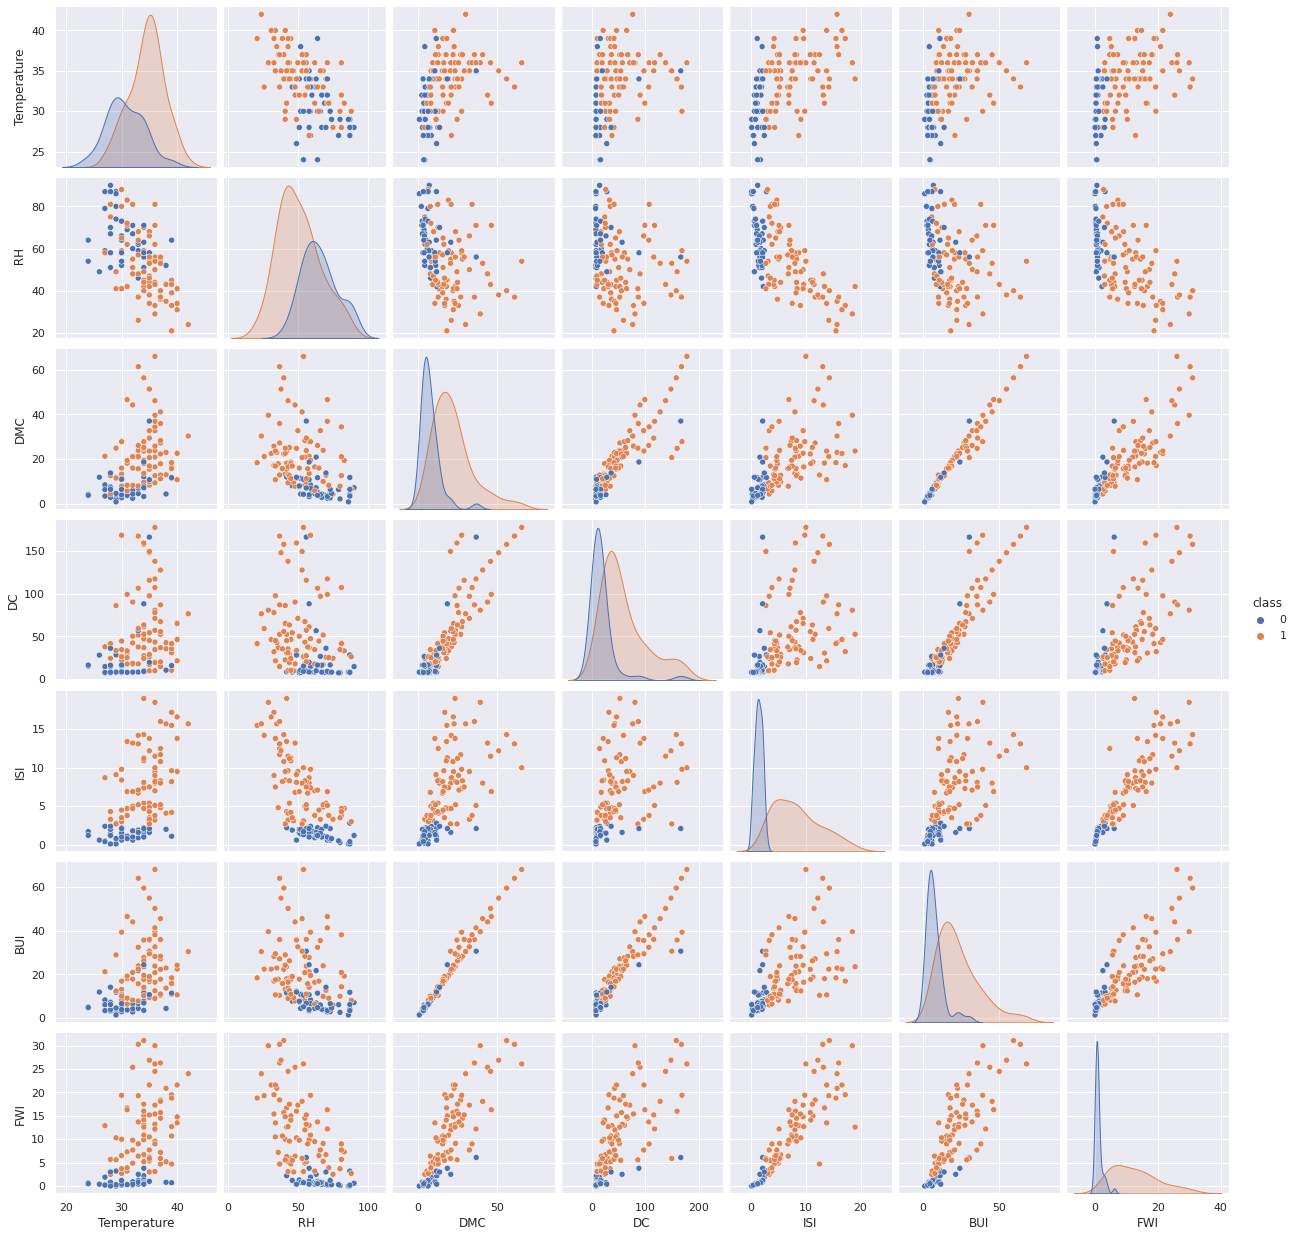

In [138]:
sns.pairplot(df, hue='class')
plt.show()

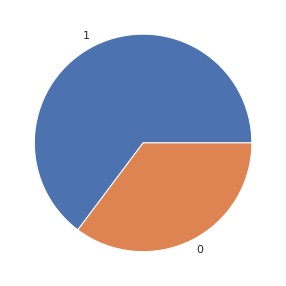

In [139]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

## **Data Matrix**

In [140]:
X = df.drop(columns=['class'])
X.head(10)

,Temperature,RH,DMC,DC,ISI,BUI,FWI
0,32,71,2.5,8.2,0.6,2.8,0.2
1,30,73,2.7,7.8,0.6,2.9,0.2
2,29,80,2.2,7.6,0.3,2.6,0.1
3,30,64,5.2,15.4,2.2,5.6,1.0
4,32,60,6.0,17.6,1.8,6.5,0.9
5,35,54,8.4,26.3,3.1,9.3,3.1
6,35,44,9.9,28.9,5.4,10.7,6.0
7,28,51,7.7,7.4,1.5,7.3,0.8
8,27,59,8.5,14.7,2.4,8.3,1.9
9,30,41,13.3,22.5,8.4,13.1,10.0


In [141]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,122.0,33.163934,3.675608,24.0,30.000,34.00,36.000,42.0
RH,122.0,55.901639,15.716186,21.0,43.250,56.00,66.750,90.0
DMC,122.0,17.031967,12.995068,0.9,7.325,13.15,22.900,65.9
DC,122.0,45.416311,42.927028,7.3,14.700,31.50,56.975,177.3
ISI,122.0,5.892623,4.832913,0.1,1.825,4.60,8.625,19.0
BUI,122.0,17.903279,13.878868,1.4,7.400,13.90,23.875,68.0
FWI,122.0,8.473770,8.142905,0.0,0.925,5.95,13.650,31.1


## **Standardize the Data**

In [142]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Temperature,RH,DMC,DC,ISI,BUI,FWI
0,-0.317970,0.964650,-1.122879,-0.870542,-1.099637,-1.092709,-1.020261
1,-0.864342,1.092432,-1.107425,-0.879899,-1.099637,-1.085474,-1.020261
2,-1.137528,1.539670,-1.146060,-0.884577,-1.161967,-1.107179,-1.032592
3,-0.864342,0.517413,-0.914251,-0.702124,-0.767208,-0.890131,-0.921611
4,-0.317970,0.261849,-0.852436,-0.650663,-0.850315,-0.825017,-0.933942
5,0.501587,-0.121498,-0.666989,-0.447157,-0.580217,-0.622440,-0.662654
6,0.501587,-0.760408,-0.551084,-0.386340,-0.102351,-0.521151,-0.305047
7,-1.410713,-0.313171,-0.721077,-0.889255,-0.912646,-0.767138,-0.946273
8,-1.683899,0.197958,-0.659262,-0.718498,-0.725655,-0.694789,-0.810629
9,-0.864342,-0.952081,-0.288368,-0.536045,0.520952,-0.347513,0.188203


In [143]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,122.0,-4.149686e-16,1.004124,-2.503456,-0.864342,0.228401,0.774773,2.413887
RH,122.0,1.319527e-16,1.004124,-2.229903,-0.808327,0.006284,0.693113,2.178580
DMC,122.0,-2.693656e-16,1.004124,-1.246511,-0.750054,-0.299958,0.453421,3.776014
DC,122.0,5.187108e-17,1.004124,-0.891594,-0.718498,-0.325522,0.270374,3.084945
ISI,122.0,-1.801837e-16,1.004124,-1.203520,-0.845121,-0.268565,0.567700,2.723291
BUI,122.0,-2.830159e-16,1.004124,-1.193998,-0.759903,-0.289634,0.432049,3.624453
FWI,122.0,-4.823100e-17,1.004124,-1.044924,-0.930859,-0.311213,0.638295,2.790102


## **Observations and variables**

In [144]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]
['Temperature', ' RH', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'class']


## **Data Visualisation**

## **Box & Whisker Plots**

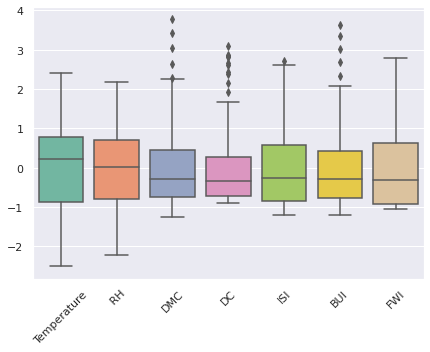

In [145]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

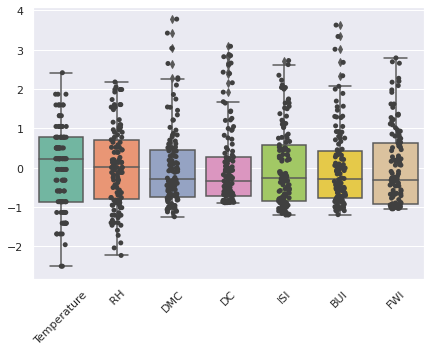

In [146]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

## **Covariance**

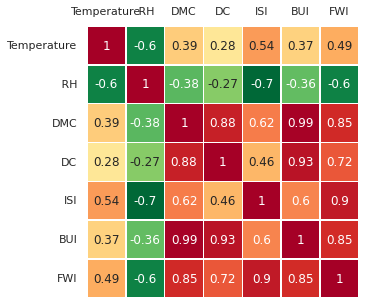

In [147]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## **Principal Component Analysis (PCA)**

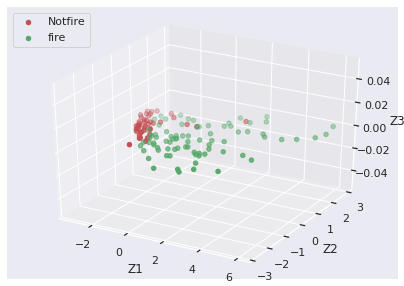

In [148]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Notfire)->0,  2(Fire)->1
idx_Notfire = np.where(y == 0)
idx_Fire = np.where(y == 1)


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(Z[idx_Notfire,0], Z[idx_Notfire,1], c='r', label='Notfire')
ax.scatter(Z[idx_Fire,0], Z[idx_Fire,1], c='g', label='fire')

ax.legend()
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')

ax.legend(loc='upper left')

## **Eigenvectors**

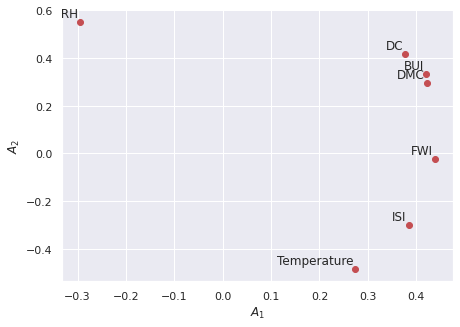

In [149]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')


In [150]:
A

array([[ 0.27436687, -0.48357233,  0.78743502, -0.26292966,  0.03026918,
        -0.02728872, -0.00581415],
       [-0.29503853,  0.55198411,  0.18808084, -0.75273511,  0.07730407,
         0.01738331,  0.00177972],
       [ 0.4219989 ,  0.29506701,  0.07634773,  0.01904282, -0.57218854,
         0.27771119,  0.5693308 ],
       [ 0.37692311,  0.41692232,  0.19339027,  0.28231056,  0.72883003,
         0.03051745,  0.18676504],
       [ 0.38437781, -0.29938474, -0.45860082, -0.44607999,  0.25835489,
         0.53264598, -0.05349218],
       [ 0.42060567,  0.33218856,  0.0886023 ,  0.07391242, -0.25953372,
         0.06770561, -0.7921404 ],
       [ 0.43916461, -0.02453829, -0.28840566, -0.28239257, -0.02024676,
        -0.79536315,  0.10293912]])

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


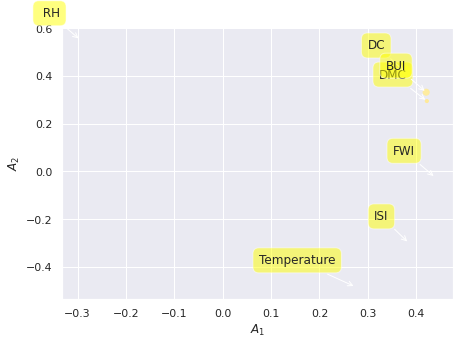

In [151]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

## **Scree plot**

Text(0, 0.5, 'Explained variance')

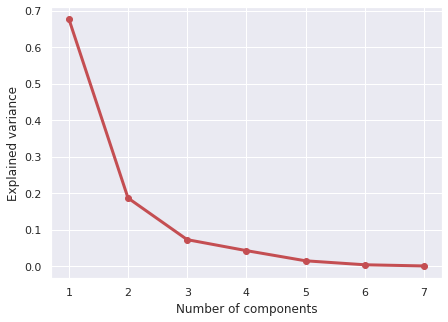

In [152]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [154]:
Lambda

array([4.7837025 , 1.31921501, 0.51395612, 0.30195301, 0.10508078,
       0.0283386 , 0.00560521])

## **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

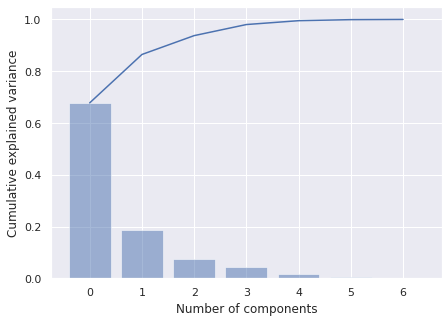

In [155]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

## **Biplot**

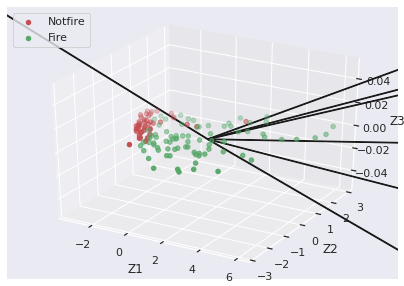

In [156]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
A3 = A[:,2]
Z1 = Z[:,0] 
Z2 = Z[:,1]
Z3 = Z[:,2]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')

for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  ax.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  ax.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,A3[i]*max(Z3)*1.2,variables[i], color='k')

ax.scatter(Z[idx_Notfire,0], Z[idx_Notfire,1], c='r', label='Notfire')
ax.scatter(Z[idx_Fire,0], Z[idx_Fire,1], c='g', label='Fire')

ax.legend(loc='upper left')

## **Using PCA Librarry**

In [157]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [158]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


## **Principal Components**

In [159]:
out['PC']

,PC1,PC2,PC3,PC4
0,-2.504169,-0.016775,0.378694,-0.211793
1,-2.685738,0.321031,-0.027493,-0.166134
2,-2.949213,0.698407,-0.132128,-0.403331
3,-2.114294,0.097693,-0.250110,0.158860
4,-1.853476,-0.221076,0.194165,0.268647
...,...,...,...,...
117,-0.699018,0.774862,-0.385057,-0.025440
118,-2.924217,1.278583,-0.190261,-0.617916
119,-3.148291,1.254754,-0.477174,-0.600903
120,-2.478012,0.535177,-1.612082,1.122231


## **Explained Variance Plot**

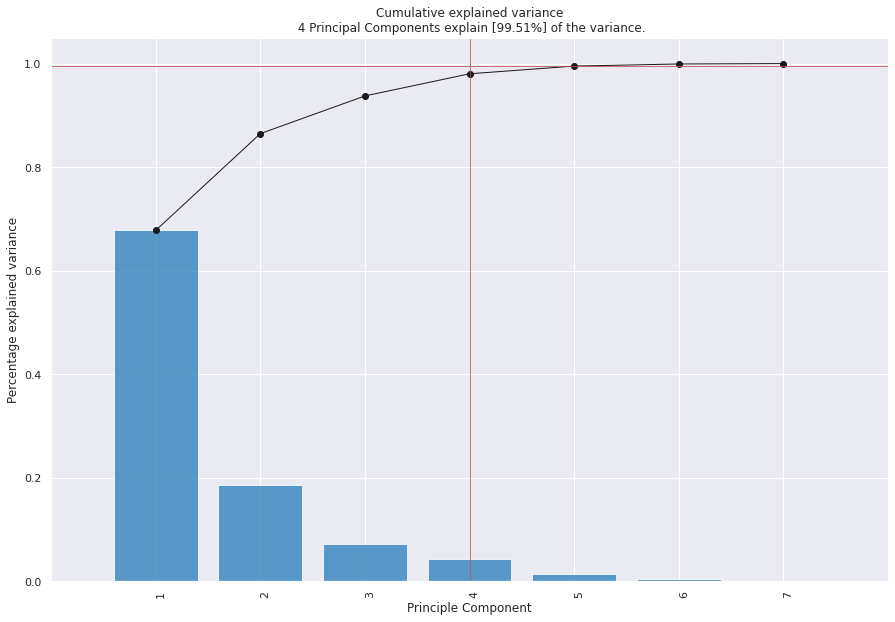

<Figure size 504x360 with 0 Axes>

In [160]:
model.plot();

## **Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [122] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [122] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5662cc2fd0>)

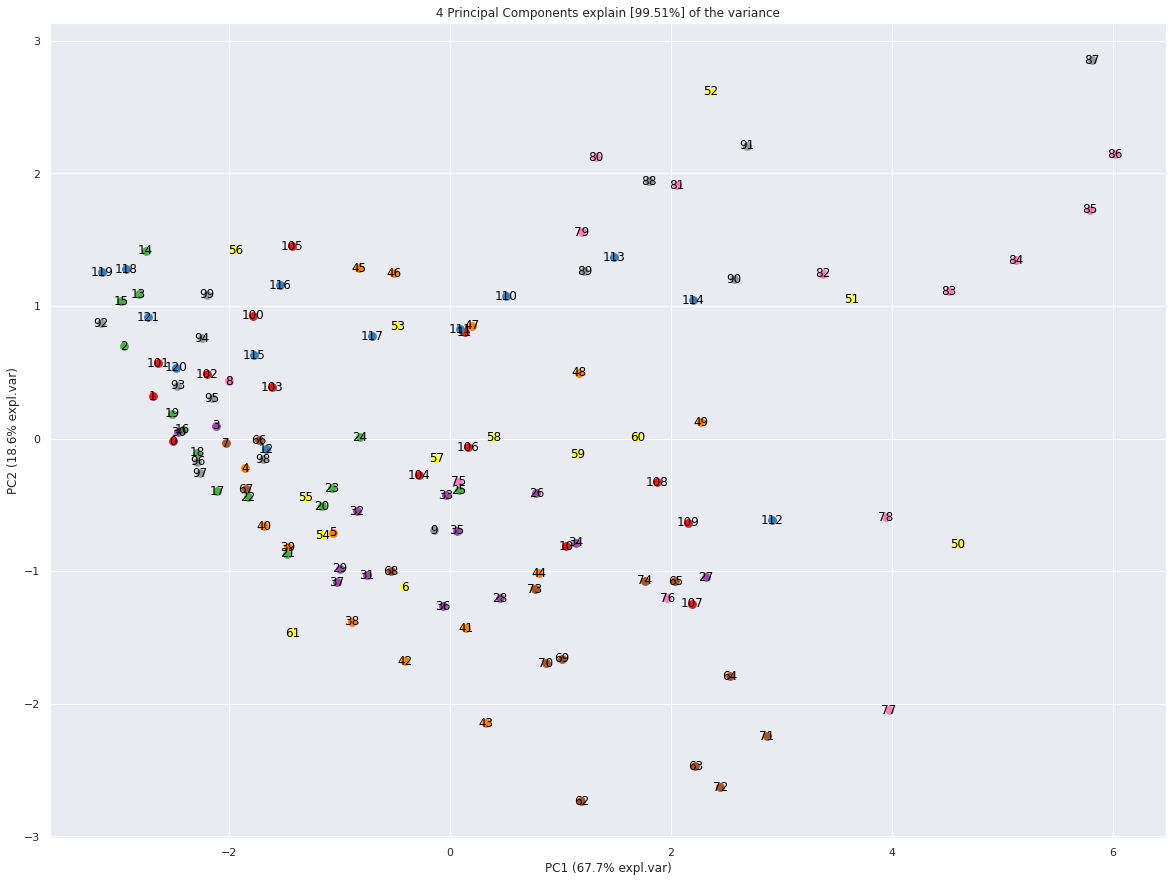

In [161]:
model.scatter(label=True, legend=False)

## **Eigenvectors**

In [163]:
A = out['loadings'].T

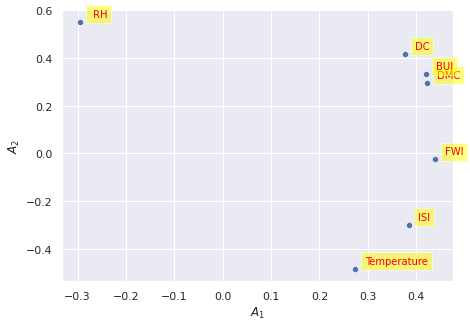

In [164]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

## **Scree Plot**

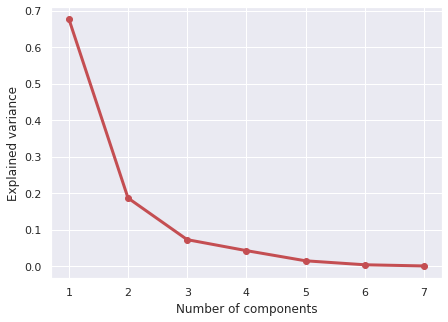

In [165]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

## **Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [122] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [122] unique colors! Available unique colors: [9].


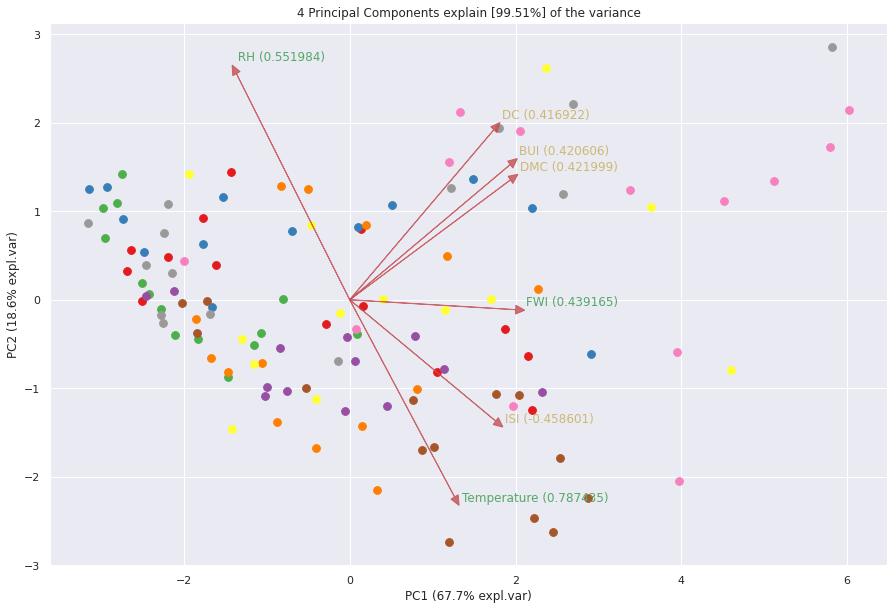

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5662cf1820>)

In [167]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [122] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [122] unique colors! Available unique colors: [9].


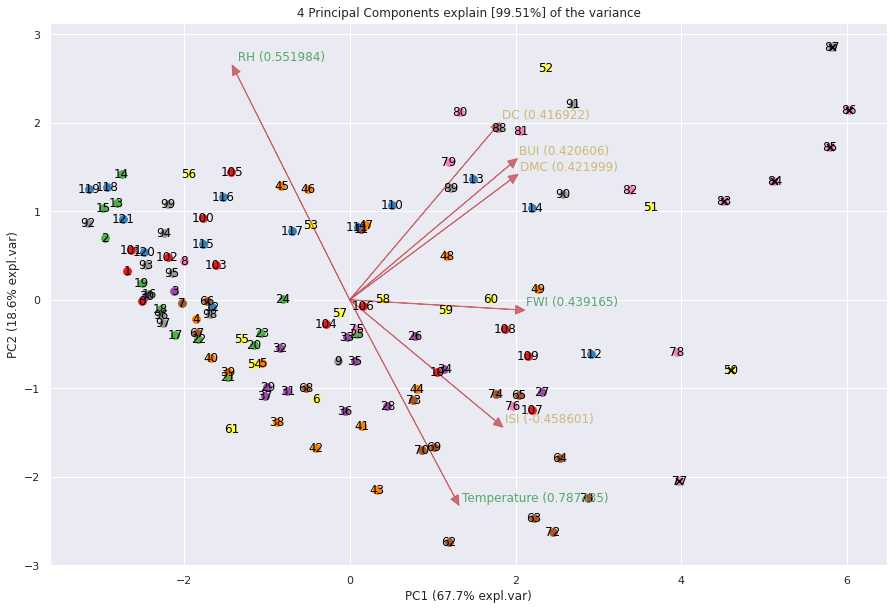

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5661d18490>)

In [168]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


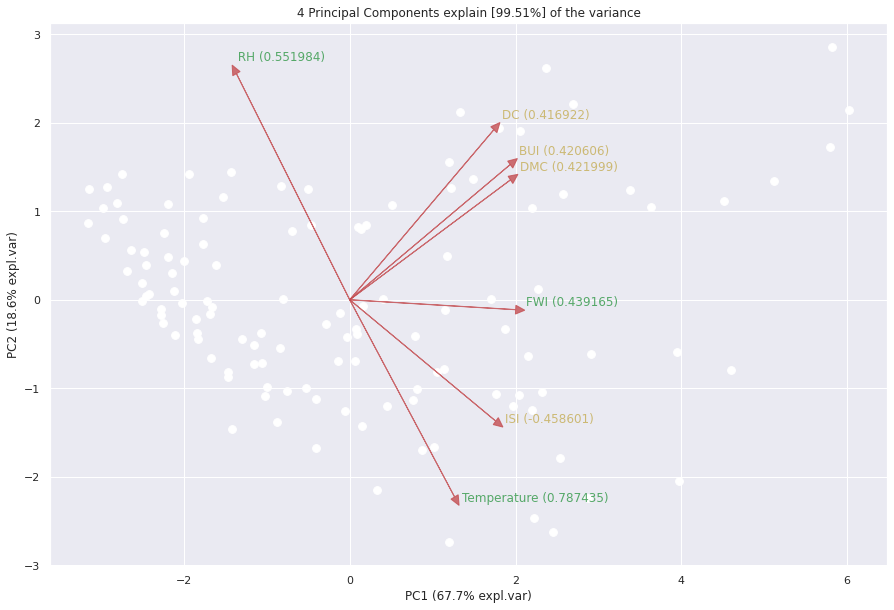

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5663f160d0>)

In [169]:
model.biplot(cmap=None, label=False, legend=False)

## **Classification**